In [111]:
import numpy as np
import re
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
directory = '/Users/bryna/Projects/Physics/HERA/h2c/'
h2c_files = glob.glob(os.path.join(directory,'acc_*.dat'))
n_files = len(h2c_files)

In [146]:
n_ants = np.zeros(n_files, dtype=int)
n_baselines = np.zeros(n_files, dtype=int)
max_ew = np.zeros(n_files)
mean_ew = np.zeros(n_files)
max_ns = np.zeros(n_files)
mean_ns = np.zeros(n_files)
max_len = np.zeros(n_files)
mean_len = np.zeros(n_files)
pos_dict = {}
uvw_dict = {}

In [147]:
for f_ind, filename in enumerate(h2c_files):
    ant_names = np.loadtxt(filename, usecols=0, dtype=str)
    ant_nums = [int(re.findall(r'\d+', name)[0]) for name in ant_names]
    data = np.loadtxt(filename, usecols=(1,2,3))
    eastings = data[:, 0]
    northings = data[:, 1]
    altitudes = data[:, 2]
    pos_dict[f_ind] = np.array([eastings,northings,altitudes]).T
    n_ants[f_ind] = ant_names.shape[0]
    n_baselines[f_ind] = int(n_ants[f_ind] * (n_ants[f_ind]-1) / 2)

    uvw_array = np.zeros((n_baselines[f_ind], 3), dtype = float)
    ant1_array = np.zeros(n_baselines[f_ind], dtype = int)
    ant2_array = np.zeros(n_baselines[f_ind], dtype = int)
    bl_ind = 0
    for ind1, ant1 in enumerate(ant_nums):
        for ind2, ant2 in enumerate(ant_nums):
            if ant1 < ant2:
                ant1_array[bl_ind] = ant1
                ant2_array[bl_ind] = ant2
                uvw_array[bl_ind, :] = [eastings[ind1] - eastings[ind2], northings[ind1] - northings[ind2],
                                        altitudes[ind1] - altitudes[ind2]]
                bl_ind += 1
    uvw_dict[f_ind] = uvw_array
    max_ew[f_ind] = np.max(uvw_array[:,0])
    mean_ew[f_ind] = np.mean(uvw_array[:,0])
    max_ns[f_ind] = np.max(uvw_array[:,1])
    mean_ns[f_ind] = np.mean(uvw_array[:,1])
    max_len[f_ind] = np.max(np.linalg.norm(uvw_array, axis=1))
    mean_len[f_ind] = np.mean(np.linalg.norm(uvw_array, axis=1))

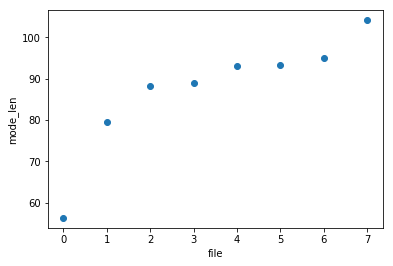

In [126]:
plt.scatter(range(n_files), mean_len)
plt.xlabel("file")
plt.ylabel("mode_len")
plt.show()

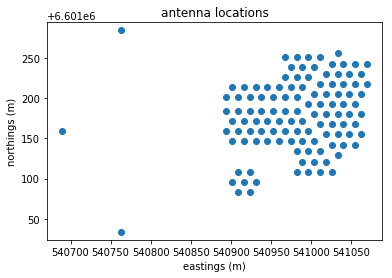

In [153]:
positions = pos_dict[5]
plt.scatter(positions[:, 0], positions[:, 1])
plt.xlabel("eastings (m)")
plt.ylabel("northings (m)")
plt.axes().set_aspect('equal', 'datalim')
plt.title('antenna locations')
plt.show()

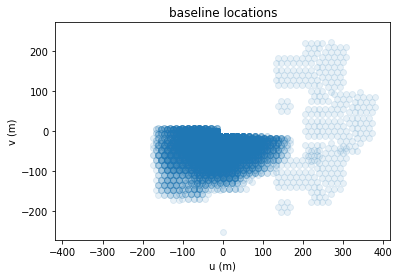

In [151]:
uvw_array = uvw_dict[5]
max_uv = np.max(abs(uvw_array[:,0:1])) * 1.1
plt.scatter(uvw_array[:, 0], uvw_array[:, 1], alpha=0.1)
plt.xlabel("u (m)")
plt.ylabel("v (m)")
plt.xlim(-1*max_uv, max_uv)
plt.ylim(-1*max_uv, max_uv)
plt.axes().set_aspect('equal', 'datalim')
plt.title('baseline locations')
plt.show()